### Cài đặt mô hình SVM tuyến tính từ đầu

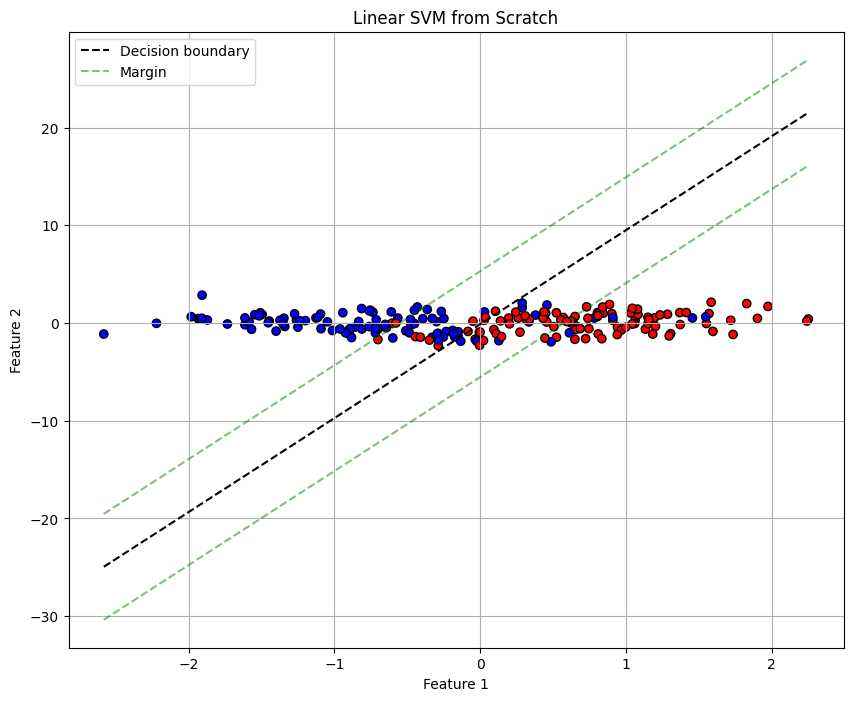

In [92]:
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# 1. Tạo dữ liệu và chuẩn hóa
X, y = make_classification(n_samples=200, n_features=2, n_classes=2, n_redundant=0, random_state=42)
y = np.where(y == 0, -1, 1) 
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 2. Khởi tạo tham số
epochs = 1000
lr = 0.01
lambda_param = 1 / len(X)
n_samples, n_features = X.shape
w = np.zeros(n_features)
b = 0


# 3. Huấn luyện SVM với SGD
for epoch in range(epochs):
    indices = np.random.permutation(n_samples)  # shuffle dữ liệu mỗi epoch
    for i in indices:
        condition = y[i] * (np.dot(X[i], w) + b)
        if condition >= 1:
            w -= lr * (2 * lambda_param * w)
            
        else:
            w -= lr * (2 * lambda_param * w - y[i] * X[i])
            b += lr * y[i]

# 4. Hàm vẽ đường phân cách
def plot_decision_boundary(X, y, w, b):
    plt.figure(figsize=(10, 8))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap="bwr", edgecolors='k')
    
    # Đường quyết định
    x0 = np.linspace(min(X[:, 0]), max(X[:, 0]), 100)
    x1 = -(w[0] * x0 + b) / w[1]
    plt.plot(x0, x1, 'k--', label='Decision boundary')

    # Margin
    margin = 1 / np.linalg.norm(w)
    x1_margin_up = -(w[0] * x0 + b - 1) / w[1]
    x1_margin_down = -(w[0] * x0 + b + 1) / w[1]
    plt.plot(x0, x1_margin_up, 'g--', alpha=0.5, label='Margin')
    plt.plot(x0, x1_margin_down, 'g--', alpha=0.5)

    plt.title("Linear SVM from Scratch")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.grid(True)
    plt.show()

# 5. Vẽ kết quả
plot_decision_boundary(X, y, w, b)
